Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
import wrangle as w

zillow = w.wrangle_zillow()

In [5]:
zillow = zillow.drop(columns='Unnamed: 0')

In [7]:
train, validate, test = w.split_data(zillow)

In [9]:
cols = ['bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'taxamount']

X_train = train[cols]
y_train = train.value

X_validate = validate[cols]
y_validate = validate.value

X_test = test[cols]
y_test = test.value

In [10]:
mm_scaler = sklearn.preprocessing.MinMaxScaler()
r_scaler = sklearn.preprocessing.RobustScaler()
s_scaler = sklearn.preprocessing.StandardScaler()

In [11]:
mm_scaler.fit(X_train)
r_scaler.fit(X_train)
s_scaler.fit(X_train)

StandardScaler()

In [23]:
X_train.head()

,bedrooms,bathrooms,sqft,yearbuilt,taxamount
223187,4,2.5,2019,1947,5241
1191302,3,2.0,1324,1969,4324
2095836,1,1.0,864,1922,2526
2102262,4,3.0,1952,1941,9061
547931,4,3.0,2524,1977,3761


In [12]:
X_train_mmscaled = mm_scaler.transform(X_train)
X_train_rscaled = r_scaler.transform(X_train)
X_train_sscaled = s_scaler.transform(X_train)

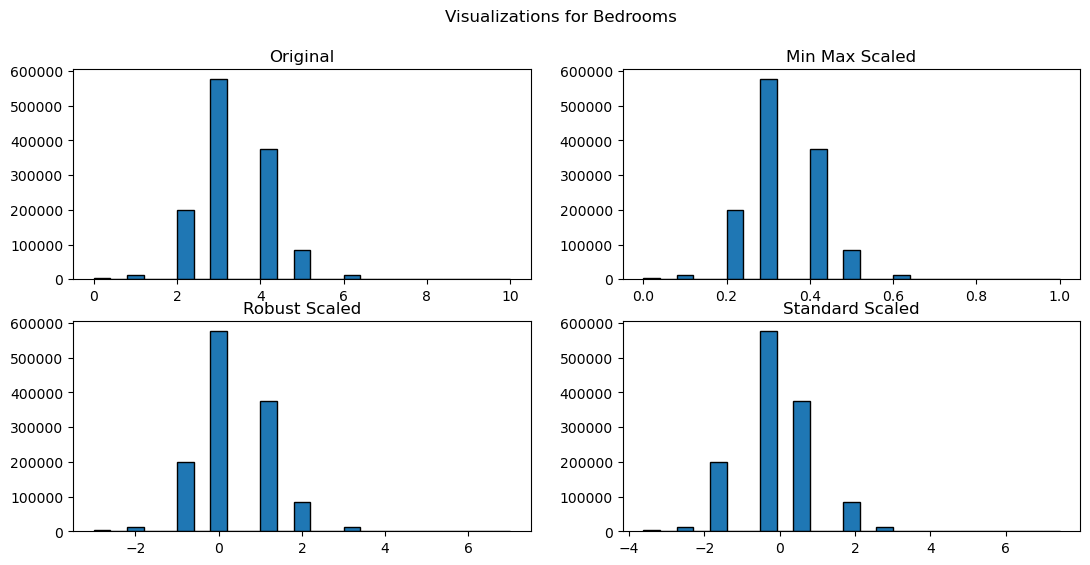

In [29]:
#For bedrooms

plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations for Bedrooms')
plt.subplot(221)
plt.hist(X_train['bedrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(X_train_mmscaled[:,0], bins=25, ec='black')
plt.title('Min Max Scaled')
plt.subplot(223)
plt.hist(X_train_rscaled[:,0], bins=25, ec='black')
plt.title('Robust Scaled')
plt.subplot(224)
plt.hist(X_train_sscaled[:,0], bins=25, ec='black')
plt.title('Standard Scaled')
plt.show()

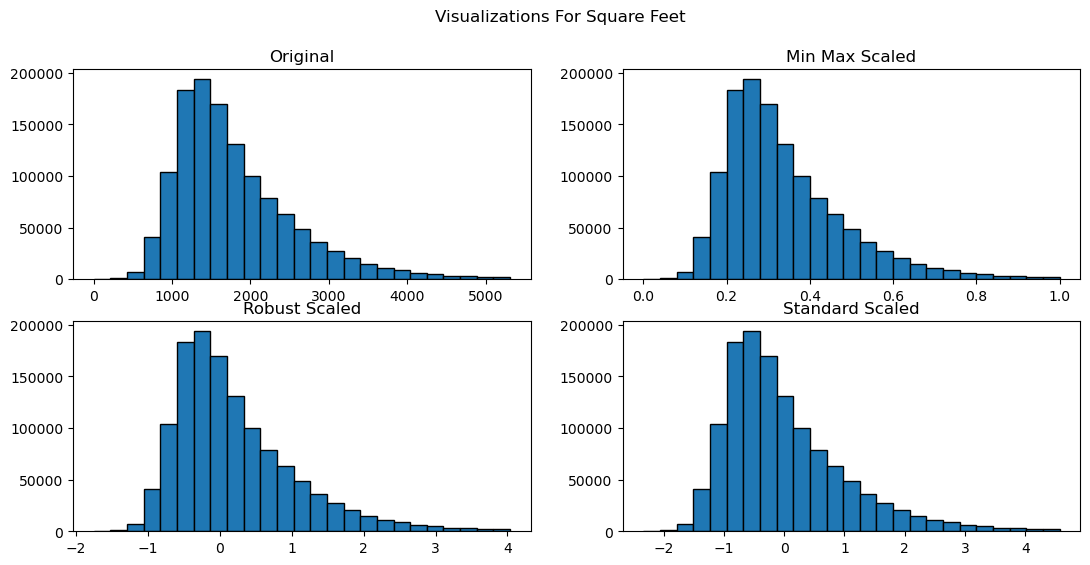

In [30]:
#For sqft

plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Square Feet')
plt.subplot(221)
plt.hist(X_train['sqft'], bins=25, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(X_train_mmscaled[:,2], bins=25, ec='black')
plt.title('Min Max Scaled')
plt.subplot(223)
plt.hist(X_train_rscaled[:,2], bins=25, ec='black')
plt.title('Robust Scaled')
plt.subplot(224)
plt.hist(X_train_sscaled[:,2], bins=25, ec='black')
plt.title('Standard Scaled')
plt.show()

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [32]:
pd.DataFrame(mm_scaler.inverse_transform(X_train_mmscaled))

,0,1,2,3,4
0,4.0,2.5,2019.0,1947.0,5241.0
1,3.0,2.0,1324.0,1969.0,4324.0
2,1.0,1.0,864.0,1922.0,2526.0
3,4.0,3.0,1952.0,1941.0,9061.0
4,4.0,3.0,2524.0,1977.0,3761.0
...,...,...,...,...,...
1263517,3.0,2.0,1472.0,1954.0,2891.0
1263518,6.0,3.0,4412.0,1967.0,7119.0
1263519,3.0,2.0,1732.0,1927.0,5772.0
1263520,3.0,2.0,1625.0,1985.0,1732.0


Yes, it's the exact same as the original data, only dtype was changed to float64.

3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [33]:
qt_scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [34]:
qt_scaler.fit(X_train)

QuantileTransformer(output_distribution='normal')

Text(0.5, 1.0, 'Quantile Transformer Scaled')

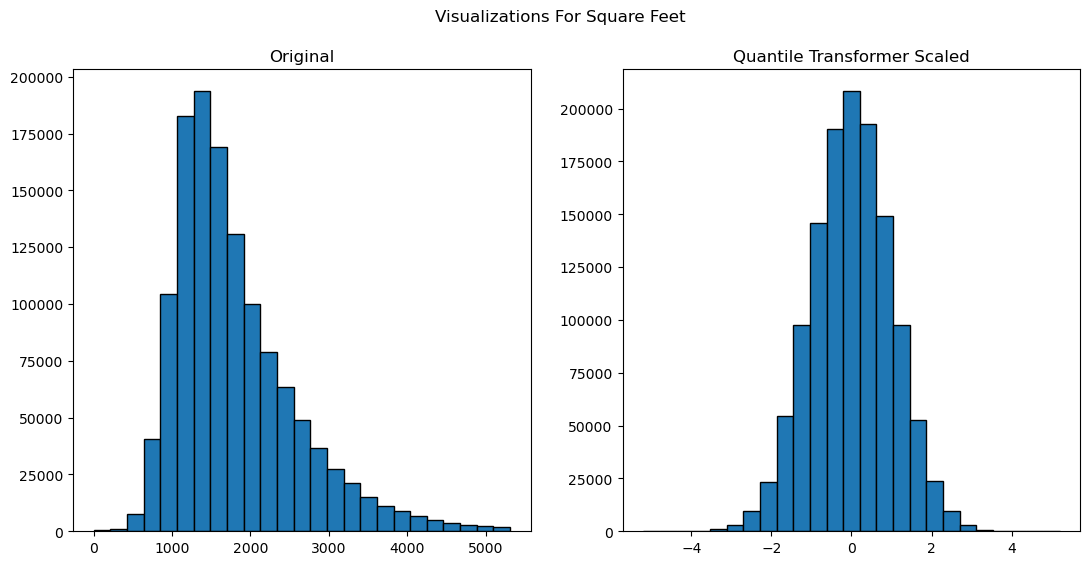

In [35]:
X_train_qtscaled = qt_scaler.transform(X_train)

plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Square Feet')
plt.subplot(121)
plt.hist(X_train['sqft'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_qtscaled[:,2], bins=25, ec='black')
plt.title('Quantile Transformer Scaled')

Text(0.5, 1.0, 'Quantile Transformer Scaled')

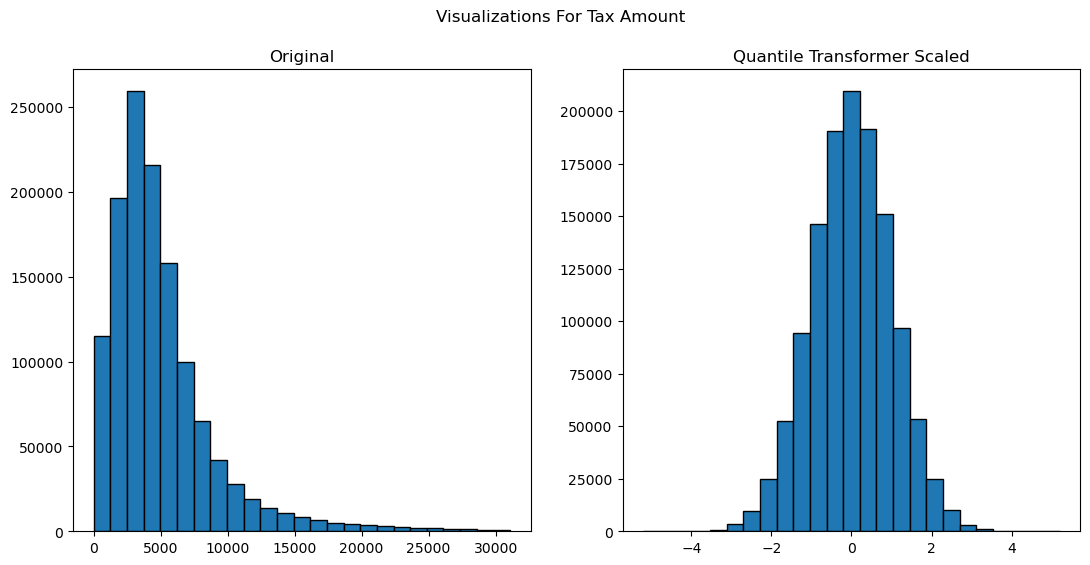

In [36]:
plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Tax Amount')
plt.subplot(121)
plt.hist(X_train['taxamount'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_qtscaled[:,4], bins=25, ec='black')
plt.title('Quantile Transformer Scaled')

Text(0.5, 1.0, 'Quantile Transformer Scaled')

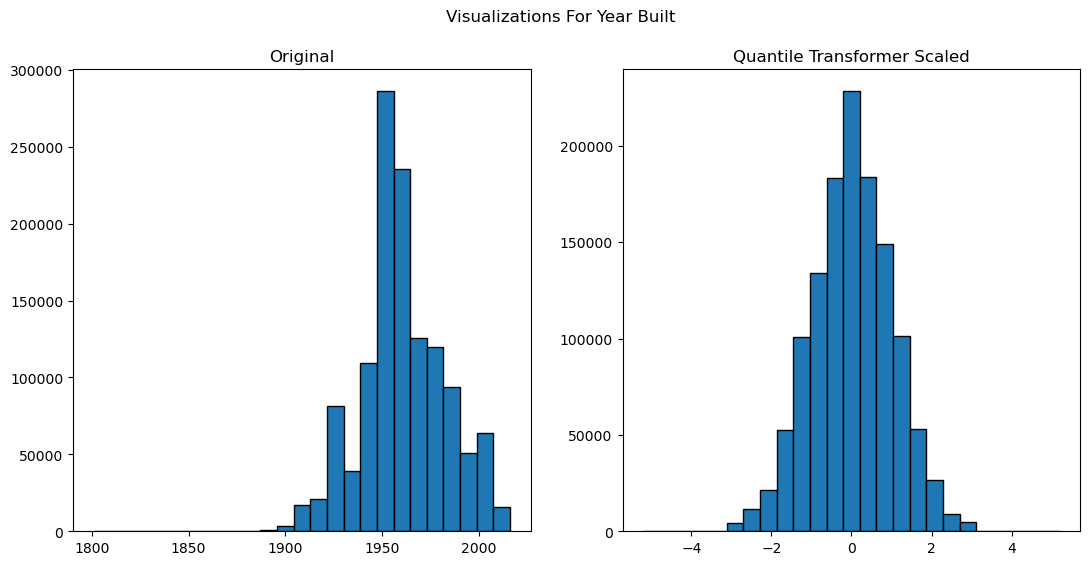

In [37]:
plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Year Built')
plt.subplot(121)
plt.hist(X_train['yearbuilt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_qtscaled[:,3], bins=25, ec='black')
plt.title('Quantile Transformer Scaled')

4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [38]:
qt_scaler = sklearn.preprocessing.QuantileTransformer()

In [39]:
qt_scaler.fit(X_train)

QuantileTransformer()

Text(0.5, 1.0, 'Quantile Transformer Scaled')

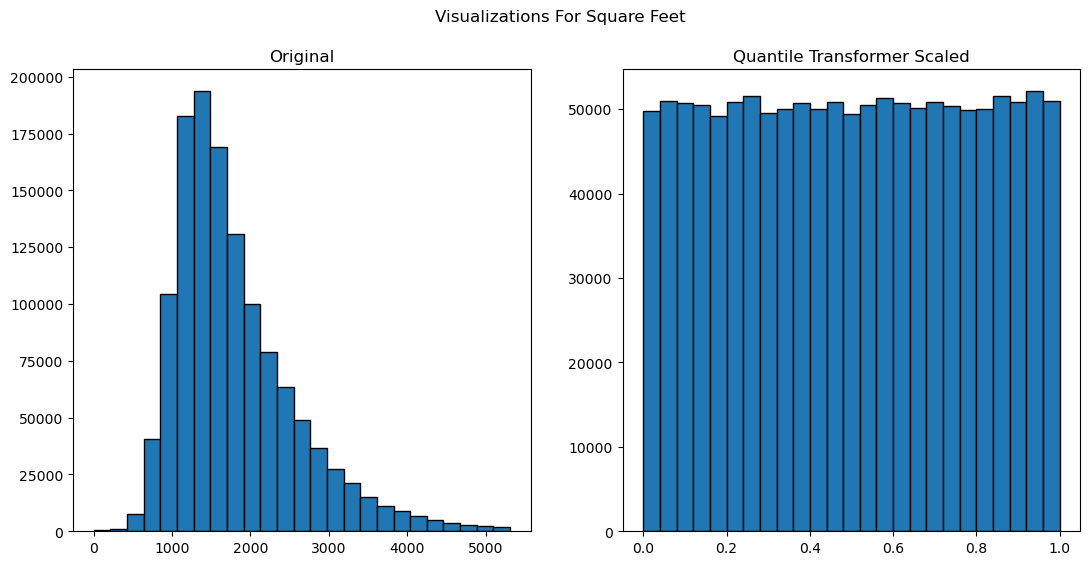

In [40]:
X_train_qtscaled = qt_scaler.transform(X_train)

plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Square Feet')
plt.subplot(121)
plt.hist(X_train['sqft'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_qtscaled[:,2], bins=25, ec='black')
plt.title('Quantile Transformer Scaled')

That the distribution is now a uniform distribution.

5) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!